In [25]:
from typing import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
class Page:
    """Class to represent a memory page."""

    
    def __init__(self, process_id, page_number):
        self.process_id = process_id
        self.page_number = page_number


    def __repr__(self):
        return f"P{self.process_id}:Page{self.page_number}"

In [27]:
class PagingSystem:
    """Class to simulate a paging system."""
    
    def __init__(self, num_frames: int):
        self.num_frames = num_frames
        self.frames = [None] * num_frames  # Physical memory (frame array)
        self.page_table = {}  # Maps (process_id, page_number) to frame index
        self.frame_queue = []  # For FIFO replacement policy
        self.page_faults = 0
        self.total_accesses = 0  # Total page accesses

    def access_page(self, process_id: int, page_number: int):
        """Simulate accessing a page in memory."""

        self.total_accesses += 1  # Increment the total accesses
        
        # Check if the page is already in memory
        page_key = (process_id, page_number)
        if page_key in self.page_table:
            print(f"Page {page_key} is already in memory (Frame {self.page_table[page_key]}).")
            return

        # Page fault occurs
        print(f"Page fault: Page {page_key} is not in memory.")
        self.page_faults += 1        

        # Allocate a frame for the page
        if None in self.frames:  # There is an empty frame
            free_index = self.frames.index(None)
            self.frames[free_index] = Page(process_id, page_number)
            self.page_table[page_key] = free_index
            self.frame_queue.append(free_index)
        else:  # No free frame, use FIFO to replace
            victim_frame = self.frame_queue.pop(0)
            victim_page = self.frames[victim_frame]

            print(f"Replacing page {victim_page} in Frame {victim_frame}.")
            # Remove victim page from page table
            del self.page_table[(victim_page.process_id, victim_page.page_number)]
            # Add the new page
            self.frames[victim_frame] = Page(process_id, page_number)
            self.page_table[page_key] = victim_frame
            self.frame_queue.append(victim_frame)

        # Visualize memory state after each access on a new subplot
        self.visualize_memory()

    def page_fault_rate(self):
        """Calculate the page fault rate."""
        return self.page_faults / self.total_accesses if self.total_accesses > 0 else 0

    def display_memory(self):
        """Display the current state of physical memory"""
        
        # Physical memory table
        memory_data = {"Frame": [f"Frame {i}" for i in range(self.num_frames)],
                       "Content": [frame if frame else "Empty" for frame in self.frames]}
        
        # Page table data
        page_table_data = {
            "Process": [key[0] for key in self.page_table.keys()],
            "Page": [key[1] for key in self.page_table.keys()],
            "Frame": [frame_index for frame_index in self.page_table.values()]
        }
        
        # Creating pandas DataFrames
        memory_df = pd.DataFrame(memory_data)
        page_table_df = pd.DataFrame(page_table_data)
        
        # Print tables
        print("\nPhysical Memory Frames:")
        print(memory_df)
        
        print("\nPage Table:")
        print(page_table_df)
        
        print(f"Total accesses: {self.total_accesses}")

        print(f"Total Page Faults: {self.page_faults}")

    def visualize_memory(self):
        """Visualize the current state of memory with a separate graph"""
        
        # Create a new figure for each plot
        fig, axes = plt.subplots(figsize=(10, 2))
        
        # Colors to represent different processes
        colors = []
        labels = []
        
        # Generate a unique color for each process
        process_colors = {}
        
        for frame in self.frames:
            if frame is None:
                colors.append("gray")  # Empty frame
                labels.append("Empty")
            else:
                # Get the color for the current process, generate if not already mapped
                process_id = frame.process_id
                if process_id not in process_colors:
                    process_colors[process_id] = np.random.rand(3,)  # Random color for each process
                
                colors.append(process_colors[process_id])  # Use the color assigned to the process
                labels.append(f"P{frame.process_id}:Page{frame.page_number}")

        # Plot the frames as bars
        axes.bar(range(self.num_frames), [1] * self.num_frames, color=colors, edgecolor="black")
        
        # Add the labels to the x-axis
        axes.set_xticks(range(self.num_frames))
        axes.set_xticklabels(labels, fontsize=10)
        axes.set_xlabel("Memory Frames", fontsize=10)
        axes.set_ylabel("Memory Occupancy", fontsize=10)
        
        # Show the plot for the current step
        plt.tight_layout()
        plt.show()

    def simulate_accesses(self, accesses: List[Tuple[int, int]]):
        """Simulate a sequence of page accesses"""

        print("Simulating paging system...\n")

        for step, (process_id, page_number) in enumerate(accesses):
            print(f"Accessing Process {process_id}, Page {page_number}...")
            print(f"Step {step + 1}")
            self.access_page(process_id, page_number)

        # After all accesses, show the memory state and performance metrics
        self.display_memory()
        print(f"\nTotal Page Faults: {self.page_faults}")
        print(f"Page Fault Rate: {self.page_fault_rate() * 100:.2f}%")

Simulating paging system...

Accessing Process 1, Page 0...
Step 1
Page fault: Page (1, 0) is not in memory.


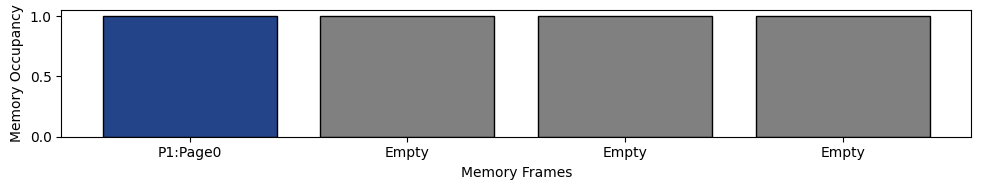

Accessing Process 1, Page 1...
Step 2
Page fault: Page (1, 1) is not in memory.


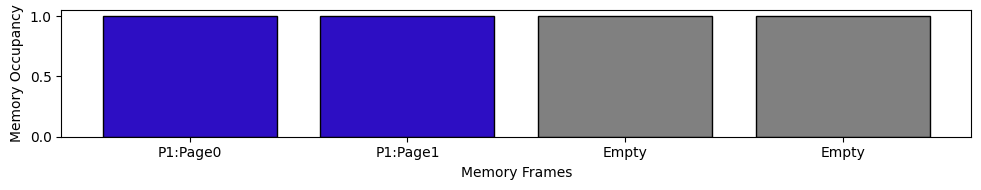

Accessing Process 2, Page 0...
Step 3
Page fault: Page (2, 0) is not in memory.


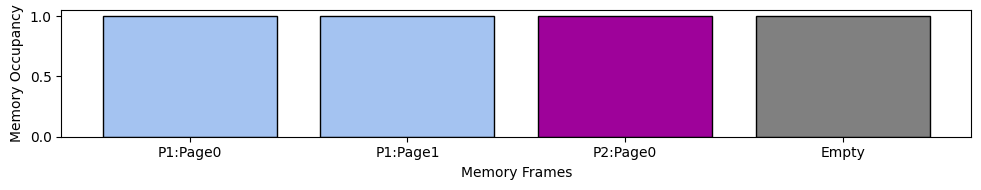

Accessing Process 3, Page 0...
Step 4
Page fault: Page (3, 0) is not in memory.


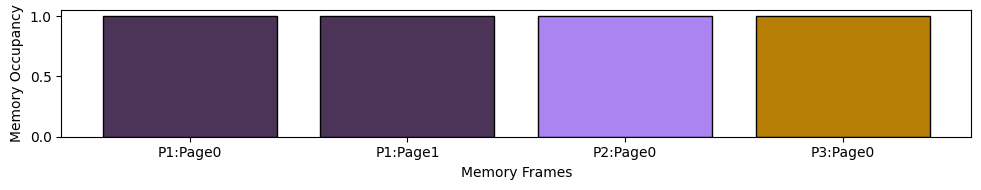

Accessing Process 4, Page 0...
Step 5
Page fault: Page (4, 0) is not in memory.
Replacing page P1:Page0 in Frame 0.


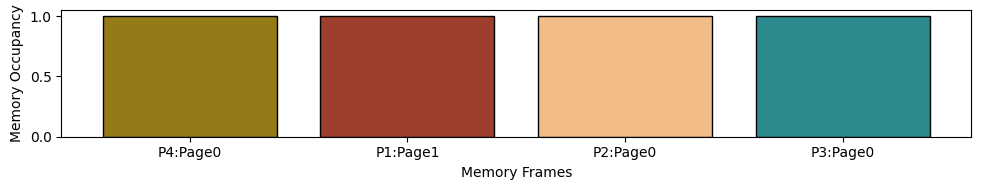

Accessing Process 1, Page 1...
Step 6
Page (1, 1) is already in memory (Frame 1).
Accessing Process 3, Page 1...
Step 7
Page fault: Page (3, 1) is not in memory.
Replacing page P1:Page1 in Frame 1.


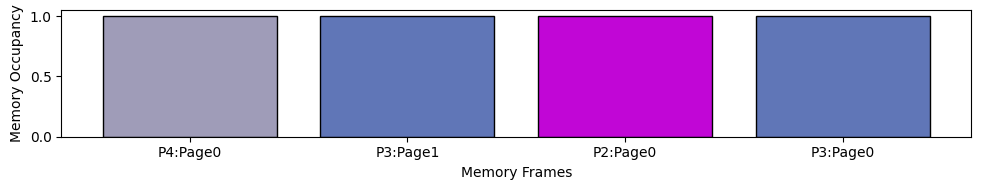

Accessing Process 3, Page 0...
Step 8
Page (3, 0) is already in memory (Frame 3).
Accessing Process 2, Page 0...
Step 9
Page (2, 0) is already in memory (Frame 2).

Physical Memory Frames:
     Frame   Content
0  Frame 0  P4:Page0
1  Frame 1  P3:Page1
2  Frame 2  P2:Page0
3  Frame 3  P3:Page0

Page Table:
   Process  Page  Frame
0        2     0      2
1        3     0      3
2        4     0      0
3        3     1      1
Total accesses: 9
Total Page Faults: 6

Total Page Faults: 6
Page Fault Rate: 66.67%


In [28]:
# Create a paging system with 4 frames
paging_system = PagingSystem(num_frames=4)

# Simulate process memory accesses
accesses = [
    (1, 0), (1, 1), (2, 0), (3, 0),  # First 4 pages fill up the frames
    (4, 0),  # Page fault, FIFO replacement
    (1, 1),  # Page already in memory
    (3, 1),  # New page, page fault
    (3, 0),  # Page already in memory
    (2, 0),  # Page fault, FIFO replacement
]

paging_system.simulate_accesses(accesses)